<a href="https://colab.research.google.com/github/bariyatlikita/Hamoye/blob/master/pattern_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

Load Data

In [2]:
filename = '/content/Africa Food Production (2004 - 2013).csv'
data = pd.read_csv(filename,
                   header=0,
                   sep=',',)
data

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [3]:
filename2 = '/content/Africa Food Supply (2004 - 2013).csv'
data2 = pd.read_csv(filename2,
                   header=0,
                   sep=',')
data2

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [4]:
df = data.groupby(['Country', 'Year', 'Item'])

print(df.head(40))

        Country                Item  Year  Value
0       Algeria  Wheat and products  2004   2731
1       Algeria  Wheat and products  2005   2415
2       Algeria  Wheat and products  2006   2688
3       Algeria  Wheat and products  2007   2319
4       Algeria  Wheat and products  2008   1111
...         ...                 ...   ...    ...
23105  Zimbabwe         Crustaceans  2009      0
23106  Zimbabwe         Crustaceans  2010      0
23107  Zimbabwe         Crustaceans  2011      0
23108  Zimbabwe         Crustaceans  2012      0
23109  Zimbabwe         Crustaceans  2013      0

[23110 rows x 4 columns]


In [5]:
df2 = data2.groupby(['Country'])

print(df2.head(40))

      Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]


In [6]:
df = data.groupby(['Country', 'Year']).sum()['Value']

print(df.head(40))

Country   Year
Algeria   2004    15536
          2005    15667
          2006    16417
          2007    14763
          2008    13841
          2009    19820
          2010    20263
          2011    21778
          2012    24206
          2013    26359
Angola    2004    13028
          2005    13811
          2006    14264
          2007    16025
          2008    17288
          2009    22244
          2010    23805
          2011    25672
          2012    20505
          2013    28857
Benin     2004     7963
          2005     7764
          2006     7110
          2007     7679
          2008     8723
          2009     9235
          2010     9200
          2011     9735
          2012     9797
          2013    10866
Botswana  2004      461
          2005      460
          2006      454
          2007      439
          2008      470
          2009      484
          2010      503
          2011      539
          2012      496
          2013      502
Name: Value, dtype: int64

In [7]:
df2 = data2.groupby(['Country']).sum()['Value']

print(df2.head(20))

Country
Algeria                     31118
Angola                      22556
Benin                       25378
Botswana                    22263
Burkina Faso                26072
Cabo Verde                  25514
Cameroon                    24603
Central African Republic    20719
Chad                        20511
Congo                       21530
Cote d'Ivoire               27666
Djibouti                    24165
Egypt                       34580
Ethiopia                    20292
Gabon                       27299
Gambia                      25695
Ghana                       29180
Guinea                      25180
Guinea-Bissau               22963
Kenya                       21453
Name: Value, dtype: int64


Data Analysis and Visualisation

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

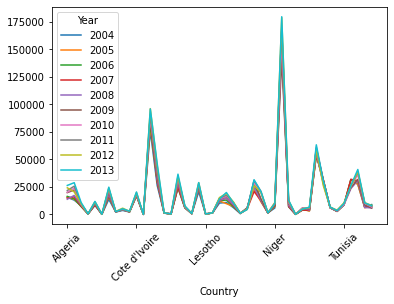

In [8]:
df.unstack().plot()
plt.xticks(rotation=45)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

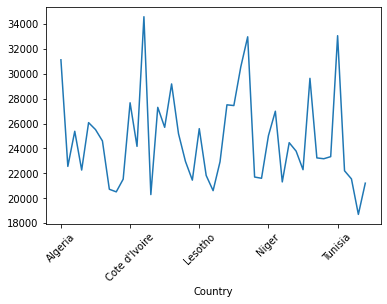

In [9]:
df2.plot()
plt.xticks(rotation=45)

In [10]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import plotly.express as px

In [12]:
list_countries = data['Country'].unique().tolist()
# print(list_countries) # Uncomment to see list of countries
d_country_code = {}  # To hold the country names and their ISO
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        # country_data is a list of objects of class pycountry.db.Country
        # The first item  ie at index 0 of list is best fit
        # object of class Country have an alpha_3 attribute
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        d_country_code.update({country: ' '})

# print(d_country_code) # Uncomment to check dictionary  

# create a new column iso_alpha in the df
# and fill it with appropriate iso 3 code
for k, v in d_country_code.items():
    data.loc[(data.Country == k), 'iso_alpha'] = v

# print(data.head)  # Uncomment to confirm that ISO codes added
# ----------- Step 3 ------------
fig = px.choropleth(data_frame = data,
                    locations= "iso_alpha",
                    color= "Value",  # value in column 'Value' determines color
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',  #  color scale red, yellow green
                    animation_frame= "Year")


could not add ISO 3 code for -> Algeria
could not add ISO 3 code for -> Angola
could not add ISO 3 code for -> Benin
could not add ISO 3 code for -> Botswana
could not add ISO 3 code for -> Burkina Faso
could not add ISO 3 code for -> Cabo Verde
could not add ISO 3 code for -> Cameroon
could not add ISO 3 code for -> Central African Republic
could not add ISO 3 code for -> Chad
could not add ISO 3 code for -> Congo
could not add ISO 3 code for -> Cote d'Ivoire
could not add ISO 3 code for -> Djibouti
could not add ISO 3 code for -> Egypt
could not add ISO 3 code for -> Ethiopia
could not add ISO 3 code for -> Gabon
could not add ISO 3 code for -> Gambia
could not add ISO 3 code for -> Ghana
could not add ISO 3 code for -> Guinea
could not add ISO 3 code for -> Guinea-Bissau
could not add ISO 3 code for -> Kenya
could not add ISO 3 code for -> Lesotho
could not add ISO 3 code for -> Liberia
could not add ISO 3 code for -> Madagascar
could not add ISO 3 code for -> Malawi
could not add I

In [13]:
list_countries = data2['Country'].unique().tolist()
# print(list_countries) # Uncomment to see list of countries
d_country_code = {}  # To hold the country names and their ISO
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        # country_data is a list of objects of class pycountry.db.Country
        # The first item  ie at index 0 of list is best fit
        # object of class Country have an alpha_3 attribute
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        d_country_code.update({country: ' '})

# print(d_country_code) # Uncomment to check dictionary  

# create a new column iso_alpha in the df
# and fill it with appropriate iso 3 code
for k, v in d_country_code.items():
    data2.loc[(data2.Country == k), 'iso_alpha'] = v

# print(df2.head)  # Uncomment to confirm that ISO codes added
# ----------- Step 3 ------------
fig = px.choropleth(data_frame = data2,
                    locations= "iso_alpha",
                    color= "Value",  # value in column 'Value' determines color
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',  #  color scale red, yellow green
                    animation_frame= "Year")


could not add ISO 3 code for -> Algeria
could not add ISO 3 code for -> Angola
could not add ISO 3 code for -> Benin
could not add ISO 3 code for -> Botswana
could not add ISO 3 code for -> Burkina Faso
could not add ISO 3 code for -> Cabo Verde
could not add ISO 3 code for -> Cameroon
could not add ISO 3 code for -> Central African Republic
could not add ISO 3 code for -> Chad
could not add ISO 3 code for -> Congo
could not add ISO 3 code for -> Cote d'Ivoire
could not add ISO 3 code for -> Djibouti
could not add ISO 3 code for -> Egypt
could not add ISO 3 code for -> Ethiopia
could not add ISO 3 code for -> Gabon
could not add ISO 3 code for -> Gambia
could not add ISO 3 code for -> Ghana
could not add ISO 3 code for -> Guinea
could not add ISO 3 code for -> Guinea-Bissau
could not add ISO 3 code for -> Kenya
could not add ISO 3 code for -> Lesotho
could not add ISO 3 code for -> Liberia
could not add ISO 3 code for -> Madagascar
could not add ISO 3 code for -> Malawi
could not add I

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0b0917b810>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0b091822d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0b0920ee90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0b09182d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0b09214390>],
 'means': []}

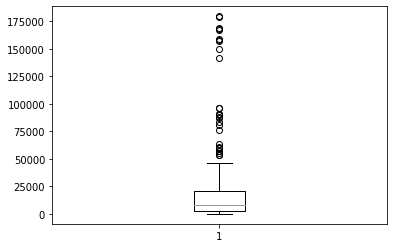

In [14]:
plt.boxplot(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0b090e7350>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0b090e7dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0b091469d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0b090ed8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0b090ede10>],
 'means': []}

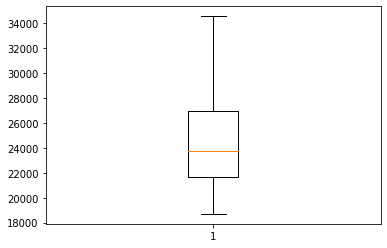

In [15]:
plt.boxplot(df2)